![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

So far we have worked on `EDA`. This lab will focus on data cleaning and wrangling from everything we noticed before.

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables. You can use any one method you want.
4. Encode the categorical variables
5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

**Hint for Categorical Variables**

- You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

```python
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.
```



In [121]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [122]:
df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [124]:
#Checking for null values
round(df.isnull().sum()/len(df),10)*100

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

In [125]:
for i in list(df.columns):
    unique_list=df[i].unique()
    print(i,unique_list)

Customer ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
State ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Customer Lifetime Value [ 2763.519279  6979.535903 12887.43165  ...  8163.890428  7524.442436
  2611.836866]
Response ['No' 'Yes']
Coverage ['Basic' 'Extended' 'Premium']
Education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Effective To Date ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
EmploymentStatus [

In [127]:
#x-y split
y=df["Total Claim Amount"]
x=df.drop("Total Claim Amount",axis=1)

# Numerical

In [128]:
x_num=x.select_dtypes("number")
x_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [129]:
#Discrete vs. Continuous variables
def discrete_continuous(x):
    cols = list(x)
    list_continuous = []
    list_discrete = []

    for i in cols:
        if x_num[i].nunique()>200:
            list_continuous.append(i)
        else:
            list_discrete.append(i)
            
    print("list continuous :",list_continuous)
    print("list discrete :",list_discrete)

In [130]:
discrete_continuous(x_num)

list continuous : ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto']
list discrete : ['Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies']


In [133]:
list_continuous=['Customer Lifetime Value', 'Income', 'Monthly Premium Auto']
list_discrete=['Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies']

In [134]:
x_cont=x_num[list_continuous]
x_disc=x_num[list_discrete]

In [135]:
x_cont.head()

,Customer Lifetime Value,Income,Monthly Premium Auto
0,2763.519279,56274,69
1,6979.535903,0,94
2,12887.431650,48767,108
3,7645.861827,0,106
4,2813.692575,43836,73


In [136]:
x_disc.head()

,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1


Column:  Months Since Last Claim


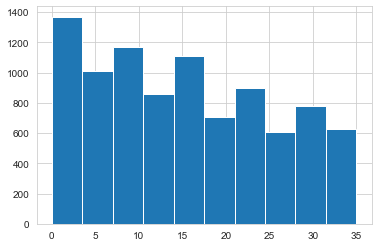

Column:  Months Since Policy Inception


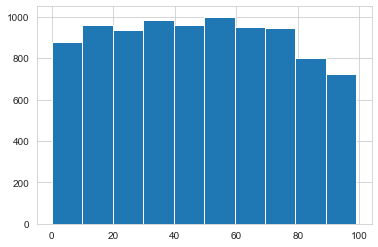

Column:  Number of Open Complaints


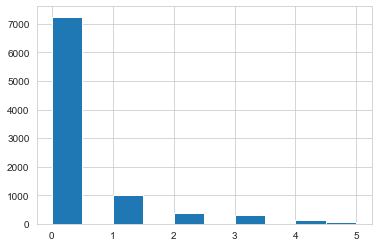

Column:  Number of Policies


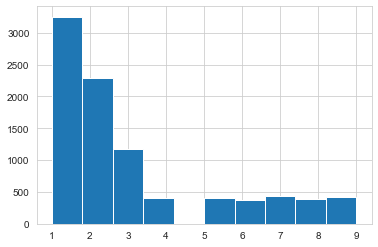

In [138]:
def discrete_plot(x):
    list_discrete=list(x)
    for col in list_discrete:
        plt.hist(x_disc[col])
        print("Column: ",col)
        plt.show()

discrete_plot(x_disc)

In [141]:
def plots(x,discrete=list_discrete,continuous=list_continuous):
    if x in discrete and (x not in continuous):
        return plt.hist(x_disc[x])
    else:
        return sns.distplot(x_cont[x])

Column:  Customer Lifetime Value


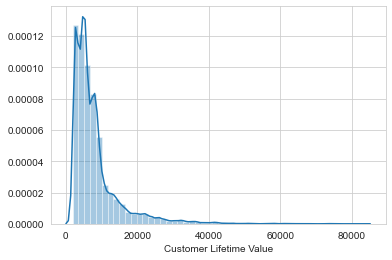

Column:  Income


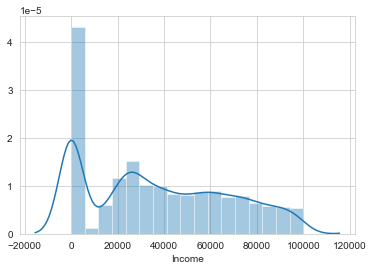

Column:  Monthly Premium Auto


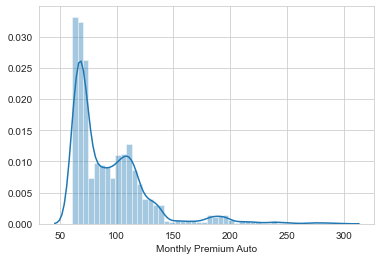

Column:  Months Since Last Claim


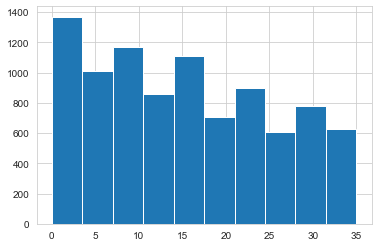

Column:  Months Since Policy Inception


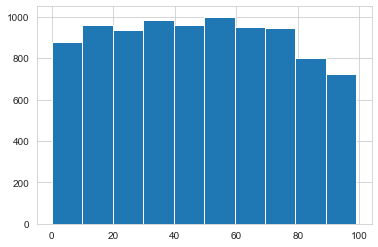

Column:  Number of Open Complaints


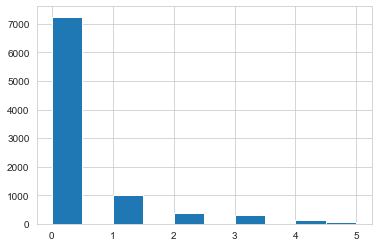

Column:  Number of Policies


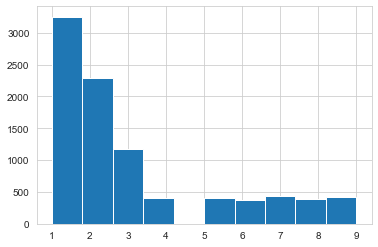

In [142]:
columns=list(x_num.columns)
for col in columns:
    plots(col)
    print("Column: ",col)
    plt.show()

In [143]:
#Finding outliers in continuous variables
def outliers(x):
    iqr = np.percentile(df_cont[x],75) - np.percentile(df_cont[x],25)
    upper_limit = np.percentile(x_cont[x],75) + 1.5*iqr
    lower_limit = np.percentile(x_cont[x],25) - 1.5*iqr
    print("The upper wisker is at: %4.2f" % upper_limit)
    print("The lower wisker is at: %4.2f" % lower_limit)
    outliers_upper = x_cont[x_cont[x] > upper_limit].index.tolist()
    outliers_lower = x_cont[lower_limit > x_cont[x]].index.tolist()
    print("The number of points outside the upper wisker is: ",len(outliers_upper))
    print("The number of points outside the lower wisker is: ",len(outliers_lower))

In [144]:
for i in list_continuous:
    print("Column: ", i)
    outliers(i)
    print(
    )

Column:  Customer Lifetime Value
The upper wisker is at: 15550.00
The lower wisker is at: -2593.58
The number of points outside the upper wisker is:  898
The number of points outside the lower wisker is:  0

Column:  Income
The upper wisker is at: 138433.00
The lower wisker is at: -76113.00
The number of points outside the upper wisker is:  0
The number of points outside the lower wisker is:  0

Column:  Monthly Premium Auto
The upper wisker is at: 161.50
The lower wisker is at: 15.50
The number of points outside the upper wisker is:  459
The number of points outside the lower wisker is:  0



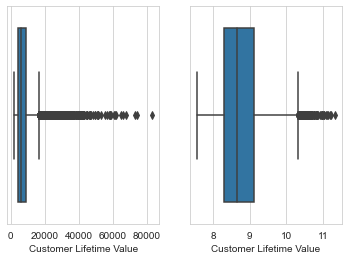

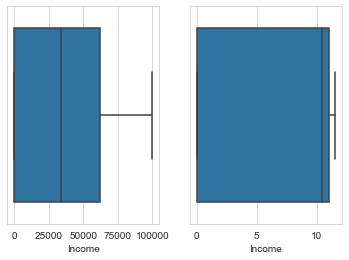

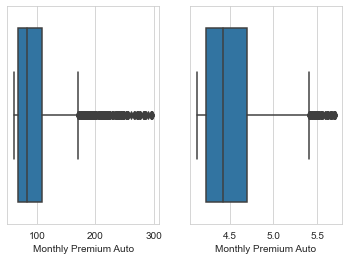

In [145]:
#Option 1: Apply log function (in my opinion better than just removing them as we avoid loosing information)
for i in list_continuous:
    fig,axes=plt.subplots(1,2)
    sns.boxplot(x_cont[i], ax=axes[0])
    sns.boxplot(np.log(x_cont[i]+1), ax=axes[1])

'''Option 2 could be dropping the outliers but it does not seem like a good option as we would be dropping to many rows
for x in list(df_cont.columns):
    iqr = np.percentile(df_cont[x],75) - np.percentile(df_cont[x],25)
    upper_limit = np.percentile(df_cont[x],75) + 1.5*iqr
    lower_limit = np.percentile(df_cont[x],25) - 1.5*iqr
    outliers_upper = df_cont[df_cont[x] > upper_limit].index.tolist()
    outliers_lower = df_cont[lower_limit > df_cont[x]].index.tolist()

    df_cont= df_cont[df_cont[x] < upper_limit]
    sns.boxplot(df_cont[x])
    plt.show()'''

df_cont.shape

In [218]:
#Normalising
from sklearn.preprocessing import Normalizer
# normalising data
transformer=Normalizer().fit(x_cont)
x_normalized=transformer.transform(x_cont)
x_normalized=pd.DataFrame(x_normalized)
x_normalized.columns=x_cont.columns
x_normalized.head()

,Customer Lifetime Value,Income,Monthly Premium Auto
0,0.049049,0.998796,0.001225
1,0.999909,0.000000,0.013467
2,0.255494,0.966808,0.002141
3,0.999904,0.000000,0.013862
4,0.064055,0.997945,0.001662


In [219]:
numericals=pd.concat([x_disc,x_normalized],axis=1)
numericals.head()

,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Customer Lifetime Value,Income,Monthly Premium Auto
0,32,5,0,1,0.049049,0.998796,0.001225
1,13,42,0,8,0.999909,0.000000,0.013467
2,18,38,0,2,0.255494,0.966808,0.002141
3,18,65,0,7,0.999904,0.000000,0.013862
4,12,44,0,1,0.064055,0.997945,0.001662


# Categoricals

In [247]:
cat=df.select_dtypes(np.object)
cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [225]:
cat["Month"]=pd.DatetimeIndex(cat['Effective To Date']).month
cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Month
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2


In [226]:
cat["Day of Week"]=pd.DatetimeIndex(cat['Effective To Date']).dayofweek
cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Month,Day of Week
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2,3
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1,0
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2,5
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1,3
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2,3


In [227]:
cat=cat.drop("Effective To Date",axis=1)
cat.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Month,Day of Week
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2,3
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1,0
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2,5
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1,3
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2,3


Column : Customer


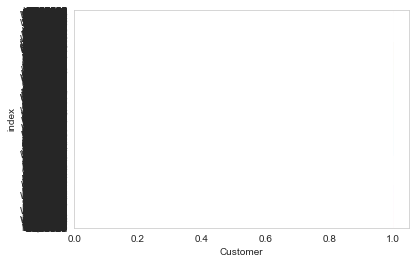

Column : State


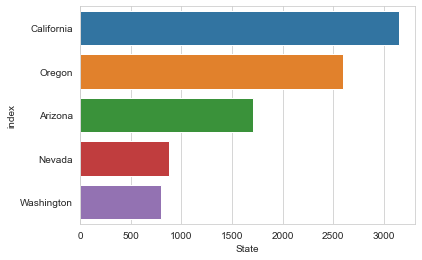

Column : Response


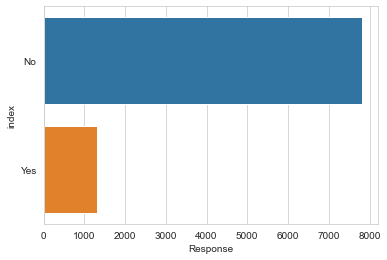

Column : Coverage


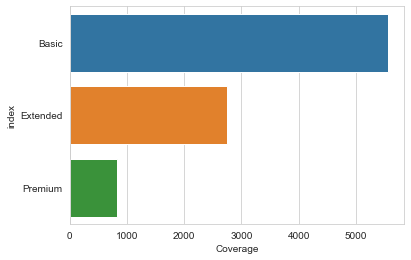

Column : Education


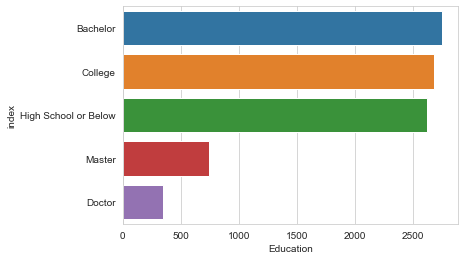

Column : Effective To Date


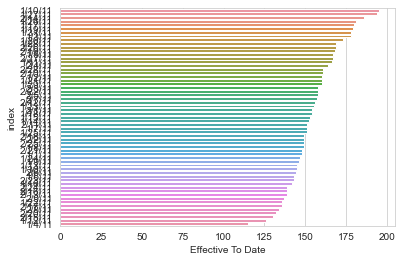

Column : EmploymentStatus


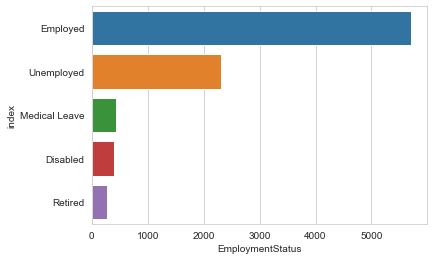

Column : Gender


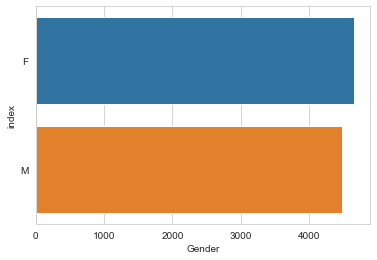

Column : Location Code


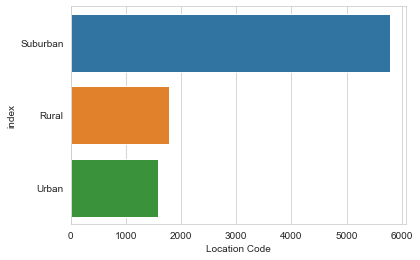

Column : Marital Status


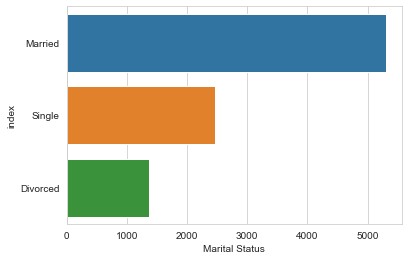

Column : Policy Type


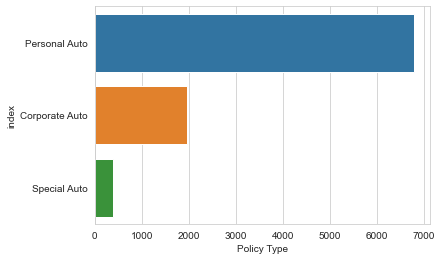

Column : Policy


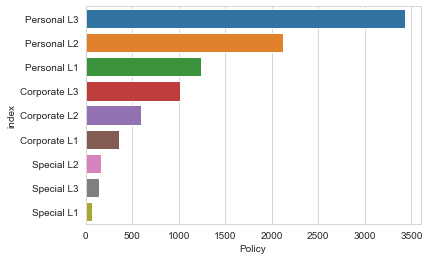

Column : Renew Offer Type


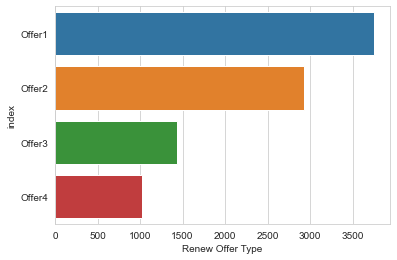

Column : Sales Channel


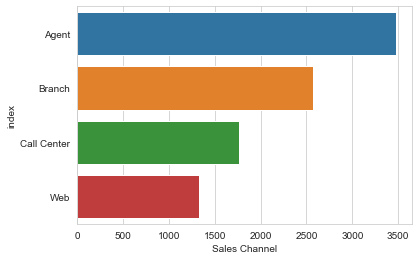

Column : Vehicle Class


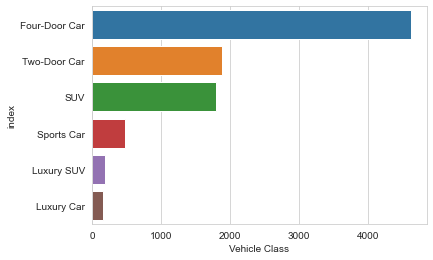

Column : Vehicle Size


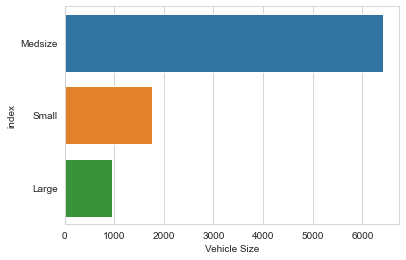

In [248]:
for i in list(cat):
    data=cat[i].value_counts().reset_index()
    sns.barplot(x=i,y="index",data=data)
    print("Column :",i)
    plt.show()

(array([4898.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4236.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

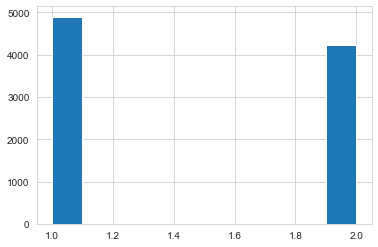

In [228]:
plt.hist(cat["Month"])

(array([1530., 1162.,    0., 1221.,    0., 1249., 1245.,    0., 1397.,
        1330.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

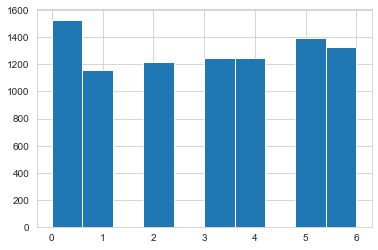

In [229]:
plt.hist(cat["Day of Week"])

In [230]:
cat_dates=cat[["Month","Day of Week"]]
cat_dates.head()

,Month,Day of Week
0,2,3
1,1,0
2,2,5
3,1,3
4,2,3


In [231]:
OneHot=["State","Marital Status","Policy Type","Policy","Renew Offer Type","Sales Channel","Vehicle Class"]
cat_onehot=cat[["State","Marital Status","Policy Type","Policy","Renew Offer Type","Sales Channel","Vehicle Class"]]
cat_onehot.head()

,State,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class
0,Washington,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
1,Arizona,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car
2,Nevada,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car
3,California,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV
4,Washington,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car


In [232]:
#ONE HOT ENCODING for categorical data
from sklearn.preprocessing import OneHotEncoder

cols = cat_onehot.columns
c = [j for i in cols for j in cat_onehot[i].unique()[1:]]

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(cat_onehot)
encoded = encoder.transform(cat_onehot).toarray()
cat_onehot= pd.DataFrame(encoded, columns= c)
cat_onehot.head()

,Arizona,Nevada,California,Oregon,Single,Divorced,Personal Auto,Special Auto,Personal L3,Corporate L2,Personal L1,Special L2,Corporate L1,Personal L2,Special L1,Special L3,Offer3,Offer2,Offer4,Call Center,Web,Branch,Four-Door Car,SUV,Luxury SUV,Sports Car,Luxury Car
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [233]:
Ordinal=["Coverage","EmploymentStatus","Location Code","Vehicle Size"]
cat_ord=cat[["Coverage","EmploymentStatus","Location Code","Vehicle Size"]]
cat_ord.head()

,Coverage,EmploymentStatus,Location Code,Vehicle Size
0,Basic,Employed,Suburban,Medsize
1,Extended,Unemployed,Suburban,Medsize
2,Premium,Employed,Suburban,Medsize
3,Basic,Unemployed,Suburban,Medsize
4,Basic,Employed,Rural,Medsize


In [234]:
cat_ord["Coverage"].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [235]:
for i in list(cat_ord.columns):
    uniques=cat_ord[i].unique()
    print(i, uniques)

Coverage ['Basic' 'Extended' 'Premium']
EmploymentStatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Location Code ['Suburban' 'Rural' 'Urban']
Vehicle Size ['Medsize' 'Small' 'Large']


In [236]:
cat_ord["Coverage"] =cat_ord["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
cat_ord["EmploymentStatus"]= cat_ord["EmploymentStatus"].map({'Employed':0, 'Unemployed':1, 'Medical Leave':2, 'Disabled':3, 'Retired':4})
cat_ord["Location Code"]=cat_ord["Location Code"].map({'Suburban':0, 'Rural':1, 'Urban':2})
cat_ord["Vehicle Size"]=cat_ord["Vehicle Size"].map({'Medsize':1, 'Small':0, 'Large':2})

In [237]:
cat_ord.head()

,Coverage,EmploymentStatus,Location Code,Vehicle Size
0,0,0,0,1
1,1,1,0,1
2,2,0,0,1
3,0,1,0,1
4,0,0,1,1


In [238]:
#All Categorical data together
categoricals=pd.concat([cat_ord,cat_onehot,cat_dates],axis=1)
categoricals.head()

,Coverage,EmploymentStatus,Location Code,Vehicle Size,Arizona,Nevada,California,Oregon,Single,Divorced,Personal Auto,Special Auto,Personal L3,Corporate L2,Personal L1,Special L2,Corporate L1,Personal L2,Special L1,Special L3,Offer3,Offer2,Offer4,Call Center,Web,Branch,Four-Door Car,SUV,Luxury SUV,Sports Car,Luxury Car,Month,Day of Week
0,0,0,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,3
1,1,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,2,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,5
3,0,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,3
4,0,0,1,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3


## The Data Frame

In [239]:
y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: Total Claim Amount, dtype: float64

In [243]:
x=pd.concat([cat["Customer"],categoricals,numericals],axis=1)
x.head()

,Customer,Coverage,EmploymentStatus,Location Code,Vehicle Size,Arizona,Nevada,California,Oregon,Single,Divorced,Personal Auto,Special Auto,Personal L3,Corporate L2,Personal L1,Special L2,Corporate L1,Personal L2,Special L1,Special L3,Offer3,Offer2,Offer4,Call Center,Web,Branch,Four-Door Car,SUV,Luxury SUV,Sports Car,Luxury Car,Month,Day of Week,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Customer Lifetime Value,Income,Monthly Premium Auto
0,BU79786,0,0,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,3,32,5,0,1,0.049049,0.998796,0.001225
1,QZ44356,1,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,13,42,0,8,0.999909,0.000000,0.013467
2,AI49188,2,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,5,18,38,0,2,0.255494,0.966808,0.002141
3,WW63253,0,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,3,18,65,0,7,0.999904,0.000000,0.013862
4,HB64268,0,0,1,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,12,44,0,1,0.064055,0.997945,0.001662


In [245]:
x=x.set_index(x.Customer)
x=x.drop("Customer",axis=1)
x.head()

,Coverage,EmploymentStatus,Location Code,Vehicle Size,Arizona,Nevada,California,Oregon,Single,Divorced,Personal Auto,Special Auto,Personal L3,Corporate L2,Personal L1,Special L2,Corporate L1,Personal L2,Special L1,Special L3,Offer3,Offer2,Offer4,Call Center,Web,Branch,Four-Door Car,SUV,Luxury SUV,Sports Car,Luxury Car,Month,Day of Week,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Customer Lifetime Value,Income,Monthly Premium Auto
Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,3,32,5,0,1,0.049049,0.998796,0.001225
QZ44356,1,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,13,42,0,8,0.999909,0.000000,0.013467
AI49188,2,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,5,18,38,0,2,0.255494,0.966808,0.002141
WW63253,0,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,3,18,65,0,7,0.999904,0.000000,0.013862
HB64268,0,0,1,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,12,44,0,1,0.064055,0.997945,0.001662


In [246]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Coverage                       9134 non-null   int64  
 1   EmploymentStatus               9134 non-null   int64  
 2   Location Code                  9134 non-null   int64  
 3   Vehicle Size                   9134 non-null   int64  
 4   Arizona                        9134 non-null   float64
 5   Nevada                         9134 non-null   float64
 6   California                     9134 non-null   float64
 7   Oregon                         9134 non-null   float64
 8   Single                         9134 non-null   float64
 9   Divorced                       9134 non-null   float64
 10  Personal Auto                  9134 non-null   float64
 11  Special Auto                   9134 non-null   float64
 12  Personal L3                    9134 non-null

![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Comparing regression models


For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.
2. Try a simple linear regression with all the data to see whether we are getting good results.
3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
4. Use the function to check `LinearRegressor` and `KNeighborsRegressor`.
5. You can check also the `MLPRegressor` for this task!
6. Check and discuss the results.



In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [253]:
#Linear Model
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train,y_train)
lm_predictions = lm_model.predict(X_test)

MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 131.40
The mean squared error of the model in the test set is: 32294.13
The root mean squared error of the model in the test set is: 179.71
The R2 of the model in the test set is: 0.60


In [273]:
#KNN Model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

knn_model = KNeighborsRegressor(n_neighbors=6) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 188.75
The mean squared error of the model in the test set is: 71900.26
The root mean squared error of the model in the test set is: 268.14
The R2 of the model in the test set is: 0.10


In [271]:
#Multi-layer Perceptron regressor
uniform_model = MLPRegressor()
uniform_model.fit(X_train, y_train)
predictions=uniform_model.predict(X_test)

MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 105.90
The mean squared error of the model in the test set is: 21664.58
The root mean squared error of the model in the test set is: 147.19
The R2 of the model in the test set is: 0.73


In [262]:
#Best K?
scores = []
for i in range(2,10): # The values of K.
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'R2')

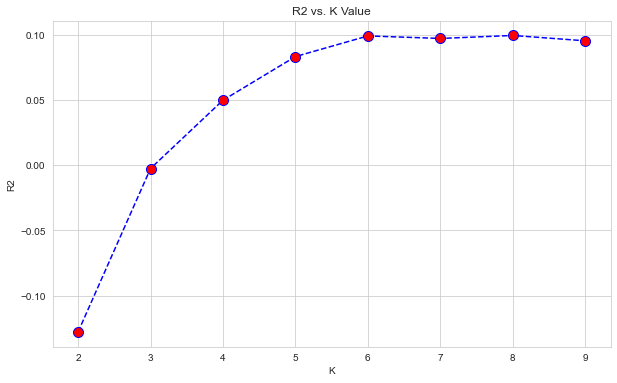

In [263]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

In [275]:
models=[MLPRegressor(),KNeighborsRegressor(),linear_model.LinearRegression()]

for i in models:
    i.fit(X_train, y_train)
    predictions=i.predict(X_test)

    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,predictions)

    print(i)
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("The R2 of the model in the test set is: %4.2f" % (R2))
    print(
    )

MLPRegressor()
The mean absolute error of the model in the test set is:  99.79
The mean squared error of the model in the test set is: 19483.46
The root mean squared error of the model in the test set is: 139.58
The R2 of the model in the test set is: 0.76

KNeighborsRegressor()
The mean absolute error of the model in the test set is: 187.58
The mean squared error of the model in the test set is: 73166.04
The root mean squared error of the model in the test set is: 270.49
The R2 of the model in the test set is: 0.08

LinearRegression()
The mean absolute error of the model in the test set is: 131.40
The mean squared error of the model in the test set is: 32294.13
The root mean squared error of the model in the test set is: 179.71
The R2 of the model in the test set is: 0.60

